In [18]:
import pandas as pd
from func import cal_buoyancy,sounding_cal
import glob
import os
import re
import datetime
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from pyhdf import SD
from scipy.interpolate import interp1d
from scipy.optimize import bisect
import numpy as np
import pickle
import numpy as np
import math
import pint
from pydoc import help
from pyhdf.SD import *
import xarray as xr
import netCDF4 as nc
import re
import matplotlib.pyplot as plt
from numpy import load
from numpy import asarray
from numpy import save
import pytz
from scipy import stats
from sklearn.linear_model import LinearRegression
from collections import Counter
import pymannkendall as mk
%matplotlib inline

In [19]:
#read in warm season 11:30CDT files

directory_path = "../../data/rong1/climate_fu/Data/DOEARM/sgp/sondewnpn"

# file name looks like: sgpsondewnpnC1.b1.20211023.214500.cdf

# all files in directory
files = [
    os.path.join(directory_path, file)
    for file in os.listdir(directory_path)
    if file.endswith(".cdf")
]

filtered_files = []
for file in files:
    file_name = os.path.basename(file)
    year_month = file_name.split('.')[2]
    if len(year_month) == 8:
        year = int(year_month[0:4])
        month = int(year_month[4:6])
        day = int(year_month[6:8])
        hours_mins_seconds = file_name.split('.')[3]
        hour = int(hours_mins_seconds[0:2])
        if 5 <= month <= 9 and hour == 17:
            filtered_files.append(file)

dfs = []
for ds in sorted(filtered_files):
    ds = xr.open_dataset(ds)
    dfs.append(ds)

In [16]:
testrun = dfs[0]
t = testrun.variables['tdry'].data
dp = testrun.variables['dp'].data
p = testrun.variables['pres'].data
alt = testrun.variables['alt'].data

numpy.ndarray

LCL: 743.4267575894208 hectopascal 13.745342156307856 degree_Celsius
[ 0.          0.01035619  0.02777694 ... -0.23493515 -0.23669158
 -0.23664425]


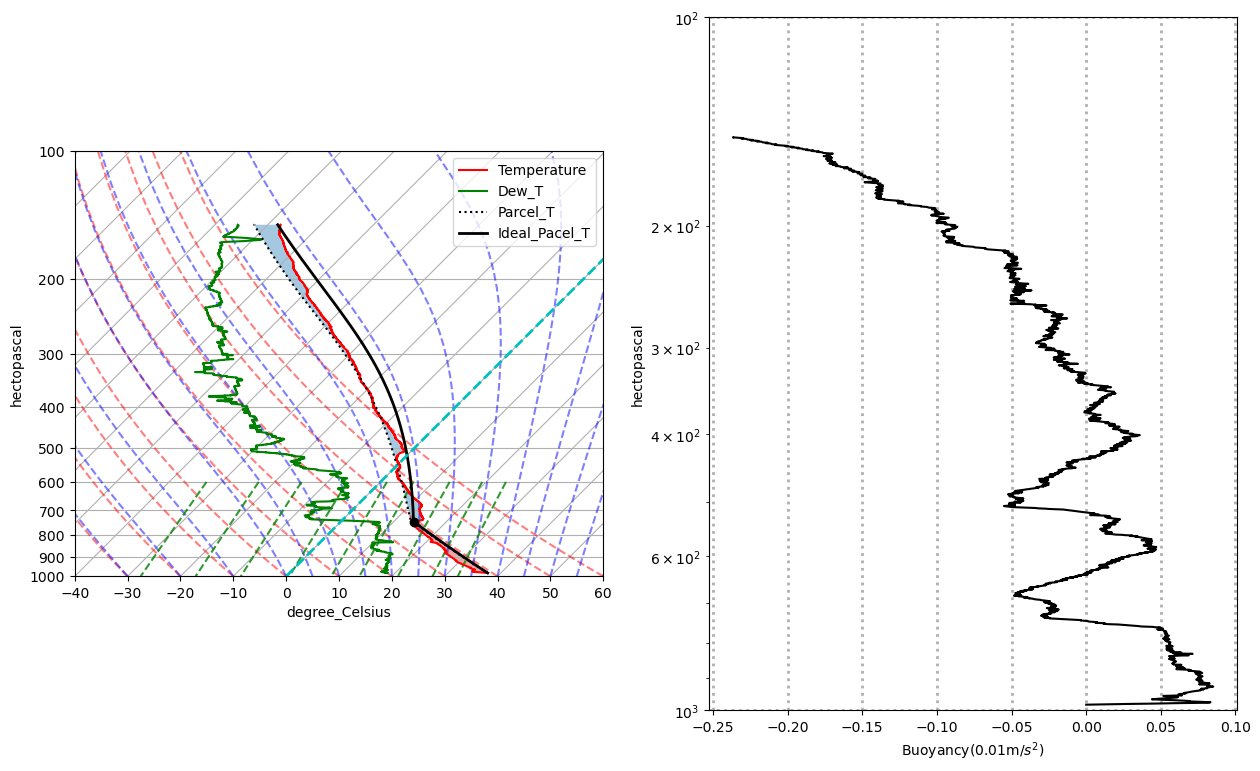

In [38]:
%run /home/annierosen16/func.ipynb
data = cal_buoyancy(t_profile = t,h_profile = dp,p_profile = p,alt_profile = alt)